In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
dataset1 = pd.read_csv('/content/dataset.csv')
X = dataset1[['x']].values
y = dataset1[['y']].values

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

In [4]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [10]:
# Name:
# Register Number:
class NeuralNet (nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn. Linear (1,8)
    self.fc2 = nn. Linear (8, 10)
    self.fc3 = nn. Linear (10, 1)
    self.relu = nn.ReLU()
    self.history = {'loss': []}
  def forward(self, x):
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = self.fc3(x) # No activation here since it's a regression task
    return x





In [12]:
# Initialize the Model, Loss Function, and Optimizer
ai_brain = NeuralNet()
criterion = nn.MSELoss()
optimizer = optim. RMSprop(ai_brain.parameters(), lr=0.001)

In [28]:
# Name:
# Register Number:
def train_model(ai_brain, X_train, y_train, criterion, optimizer, epochs=5000):
  for epoch in range(epochs):
    optimizer.zero_grad()
    loss = criterion (ai_brain (X_train), y_train)
    loss.backward()
    optimizer.step()

    ai_brain.history['loss'].append(loss.item())
    if epoch % 200 == 0:
      print(f'Epoch [{epoch}/{epochs}), Loss: {loss.item():.6f}')

In [29]:
train_model(ai_brain, X_train_tensor, y_train_tensor, criterion, optimizer)


Epoch [0/5000), Loss: 0.007687
Epoch [200/5000), Loss: 0.007733
Epoch [400/5000), Loss: 0.007714
Epoch [600/5000), Loss: 0.007711
Epoch [800/5000), Loss: 0.007729
Epoch [1000/5000), Loss: 0.007686
Epoch [1200/5000), Loss: 0.007745
Epoch [1400/5000), Loss: 0.007684
Epoch [1600/5000), Loss: 0.007727
Epoch [1800/5000), Loss: 0.007706
Epoch [2000/5000), Loss: 0.007703
Epoch [2200/5000), Loss: 0.007722
Epoch [2400/5000), Loss: 0.007678
Epoch [2600/5000), Loss: 0.007732
Epoch [2800/5000), Loss: 0.007689
Epoch [3000/5000), Loss: 0.007711
Epoch [3200/5000), Loss: 0.007707
Epoch [3400/5000), Loss: 0.007684
Epoch [3600/5000), Loss: 0.007735
Epoch [3800/5000), Loss: 0.007674
Epoch [4000/5000), Loss: 0.007714
Epoch [4200/5000), Loss: 0.007701
Epoch [4400/5000), Loss: 0.007677
Epoch [4600/5000), Loss: 0.007723
Epoch [4800/5000), Loss: 0.007665


In [30]:
with torch.no_grad():
    test_loss = criterion(ai_brain(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')


Test Loss: 0.008233


In [31]:
loss_df = pd.DataFrame(ai_brain.history)

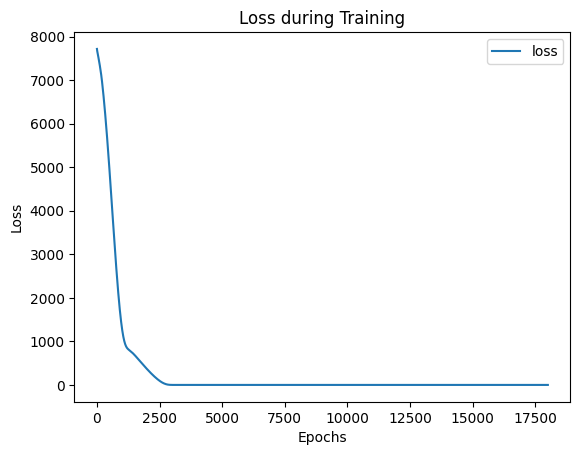

In [32]:
import matplotlib.pyplot as plt
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()

In [36]:
X_n1_1 = torch.tensor([[5]], dtype=torch.float32)
prediction = ai_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

Prediction: 25.950733184814453
